In [480]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale

In [498]:
women = pd.read_csv('athletes-women.csv')
men = pd.read_csv('test2.csv')

df_women = women[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
df_men = men[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]

In [499]:
X_w = scale(df_women)
X_m = scale(df_men)

Text(0.5, 1.0, 'K-Means Classification Location')

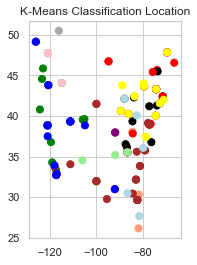

In [500]:
# location US women
mask = (df_women['longitude'] >= -135) & (df_women['longitude'] <= -60) & (df_women['latitude'] >= 25) & (df_women['latitude'] <= 60)
# mask = (df['longitude'] >= -85) & (df['longitude'] <= -75) & (df['latitude'] >= 25) & (df['latitude'] <= 35)
df_women_us = df_women.loc[mask]
X_w_us = scale(df_women_us)
color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen'])
clustering = KMeans(n_clusters=12, random_state=4)
clustering.fit(X_w_us)
plt.subplot(1,2,2)
plt.scatter(x=df_women_us['longitude'],y=df_women_us['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Location')

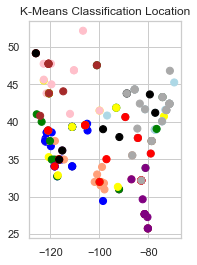

In [501]:
# location US men
mask = (df_men['longitude'] >= -135) & (df_men['longitude'] <= -60) & (df_men['latitude'] >= 25) & (df_men['latitude'] <= 60)
df_men_us = df_men.loc[mask]
X_m_us = scale(df_men_us)
color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen'])
clustering = KMeans(n_clusters=12, random_state=4)
clustering.fit(X_m_us)
plt.subplot(1,2,2)
plt.scatter(x=df_men_us['longitude'],y=df_men_us['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Location')

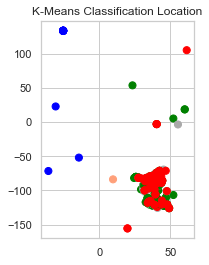

In [502]:
# location men
color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen'])
clustering = KMeans(n_clusters=5, random_state=37)
clustering.fit(X_m)
plt.subplot(1,2,2)
plt.scatter(x=df_men['latitude'],y=df_men['longitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

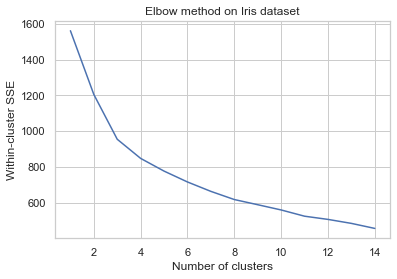

In [459]:
#Elbow method
distortations = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_m_us)
  distortations[k] = kmeans.inertia_

plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Iris dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

Text(0.5, 1.0, 'K-Means Classification Pullups')

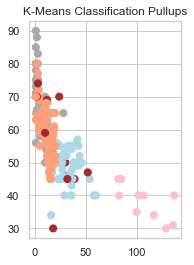

In [455]:
# pullups men
clustering = KMeans(n_clusters=5,random_state=5)
clustering.fit(X_m)
color_theme = np.array(['darkgray','lightsalmon', 'pink', 'brown', 'lightblue'])

plt.subplot(1,2,2)
plt.scatter(x=df_men['rank'],y=df_men['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

Text(0.5, 1.0, 'K-Means Classification Pullups')

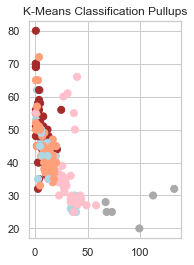

In [456]:
# pullups women
clustering = KMeans(n_clusters=5,random_state=5)
clustering.fit(X_w)
color_theme = np.array(['darkgray','lightsalmon', 'pink', 'brown', 'lightblue'])

plt.subplot(1,2,2)
plt.scatter(x=df_women['rank'],y=df_women['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

In [237]:
# mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
# df2 = df.loc[mask]
# df2
# x = scale(df2)
# color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen'])
# clustering = KMeans(n_clusters=12,random_state=4)
# clustering.fit(x)
# plt.subplot(1,2,2)
# plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
# plt.title('K-Means Classification Location')

In [188]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# df = women[['longitude', 'latitude']]

# # Load the example planets dataset

# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
# g = sns.relplot(
#     data=df,
#     x=df['longitude'], y=['latitude'],
#     hue="year", size="mass",
#     palette=cmap, sizes=(10, 200),
# )
# g.set(xscale="log", yscale="log")
# g.ax.xaxis.grid(True, "minor", linewidth=.25)
# g.ax.yaxis.grid(True, "minor", linewidth=.25)
# g.despine(left=True, bottom=True)

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 225 and the vector passed to `y` has length 1.

In [180]:
mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
df2 = df.loc[mask]
df2

,rank,age,run5k,pullups,fran,longitude,latitude
0,9,34,1204,45,53,-125.9066,49.1530
1,1,26,1180,80,124,-76.2875,36.7682
2,4,31,1110,40,125,-87.3595,36.5298
4,3,34,1263,55,128,-81.7948,26.1420
6,4,29,1182,35,130,-73.8729,45.6689
...,...,...,...,...,...,...,...
217,18,51,1400,39,355,-120.5542,43.8041
218,17,54,1349,42,368,-88.7879,43.7844
220,9,53,1224,40,396,-83.4833,42.4311
223,4,50,1353,51,235,-117.9003,33.9165


Text(0.5, 1.0, 'K-Means Classification Location')

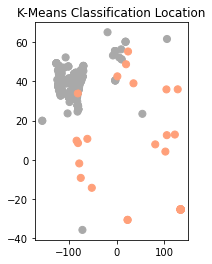

In [105]:
plt.subplot(1,2,2)
plt.scatter(x=df['longitude'],y=df['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Run5k')

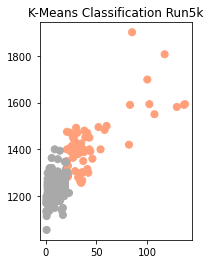

In [94]:
plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

In [106]:
# df2 = df.iloc[:, lambda x: x.index >= 18 and x.index <= 34]
# df2 = df['age'].between(18, 34, inclusive=True)
mask = (df['age'] >= 18) & (df['age'] <= 34)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Fran')

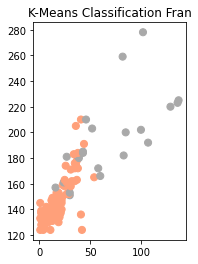

In [107]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

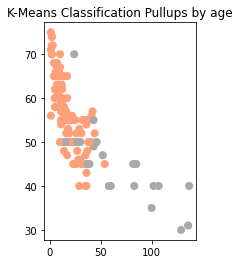

In [108]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

Text(0.5, 1.0, 'K-Means Classification Location')

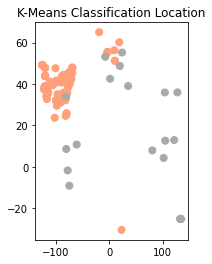

In [109]:
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Pullups')

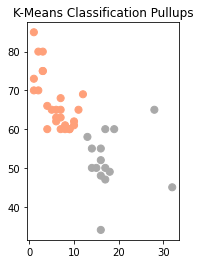

In [98]:
mask = (df['age'] >= 34) & (df['age'] <= 39)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')